**Classifying Rock, Paper, and Scissor with Deep Learning Model**

Submission Machine Learning untuk Pemula (Machine Learning for Beginners)

Nama : Yohanes Setiawan

Asal : Surabaya, Indonesia

Email : yoh.set95@gmail.com

# **Data Understanding**

* Image dataset: rock, paper, and scissors
* Source: https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip

# **Goal**
Classifying images of rock, paper, and scissors

# **Load Data**

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Taking the dataset from Drive
!cp '/content/drive/My Drive/ML_Pemula/Dataset.zip' '/content/sample_data'

In [ ]:
!unzip "/content/sample_data/Dataset.zip"

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


# **Data Preparation**

In [ ]:
!pip install split_folders
import splitfolders
#memakai splitfolders mode ratio, 60% Training, 40% Testing

splitfolders.ratio("/content/Dataset", seed=68, ratio=(.6, .4), group_prefix=None)

Copying files: 2188 files [00:00, 4544.33 files/s]


In [ ]:
#Count files from training and testing data
import os

path7, dirs7, files7 = next(os.walk("/content/Dataset/paper"))
path8, dirs8, files8 = next(os.walk("/content/Dataset/rock"))
path9, dirs9, files9 = next(os.walk("/content/Dataset/scissors"))
file_count = len(files7) + len(files8) + len(files9)
print("Banyaknya dataset adalah "+ str(file_count))

path1, dirs1, files1 = next(os.walk("/content/output/train/paper"))
path2, dirs2, files2 = next(os.walk("/content/output/train/rock"))
path3, dirs3, files3 = next(os.walk("/content/output/train/scissors"))
file_count = len(files1) + len(files2) + len(files3)
print("Banyaknya data training adalah "+ str(file_count))

path4, dirs4, files4 = next(os.walk("/content/output/val/paper"))
path5, dirs5, files5 = next(os.walk("/content/output/val/rock"))
path6, dirs6, files6 = next(os.walk("/content/output/val/scissors"))
file_count2 = len(files4) + len(files5) + len(files6)
print("Banyaknya data validasi adalah "+ str(file_count2))

Banyaknya dataset adalah 2188
Banyaknya data training adalah 1312
Banyaknya data validasi adalah 876


In [ ]:
#Cek direktori training
import os

os.listdir('/content/output/train')

['rock', 'paper', 'scissors']

In [ ]:
#Cek direktori testing
os.listdir('/content/output/val')

['rock', 'paper', 'scissors']

In [ ]:
#Memasukkan semua data ke variabel
base_dir = '/content/output'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

#Direktori data training
train_one_dir = os.path.join(train_dir, 'paper')
train_two_dir = os.path.join(train_dir, 'rock')
train_three_dir = os.path.join(train_dir, 'scissors')
 
#Direktori data testing
validation_one_dir = os.path.join(validation_dir, 'paper')
validation_two_dir = os.path.join(validation_dir, 'rock')
validation_three_dir = os.path.join(validation_dir, 'scissors')

In [ ]:
#Penerapan Augmentasi Gambar dengan Image Data Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagenerator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90, #random rotation antara 0-90 derajat
                    width_shift_range=0.2, #prosentasi width untuk random shift
                    height_shift_range=0.2, #prosentasi height untuk random shift
                    horizontal_flip=True, #horizontal flip untuk posisi tangan horizontal
                    brightness_range=[0.3,1.0], #mainkan brightness kalau ada kekurangan cahaya
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagenerator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90, #random rotation antara 0-90 derajat
                    width_shift_range=0.2, #prosentasi width untuk random shift
                    height_shift_range=0.2, #prosentasi height untuk random shift
                    horizontal_flip=True, #horizontal flip untuk posisi tangan horizontal
                    brightness_range=[0.3,1.0], #mainkan brightness kalau ada kekurangan cahaya
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
#Persiapan Data Training dan Validasi Generator
train_generator = train_datagenerator.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # Klasifikasi Multi-Class (>2)
        class_mode='categorical')
 
validation_generator = test_datagenerator.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, 
        # Klasifikasi Multi-Class (>2)
        class_mode='categorical')
X, y = next(train_generator)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# **Modelling**

In [ ]:
#Penggunaan Callback untuk menghentikan proses training sesuai akurasi yang diinginkan
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.998):
      print("\nSudah 99.8% nih akurasinya jadi diberhentikan saja!")
      self.model.stop_training = True

callbacks = myCallback()

#Model sederhana Deep Learning 3 Conv dan 2 Fully Connected Layer
model = tf.keras.models.Sequential([ #Menggunakan model Sequential 
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2), #melakukan dropout pada 20% dari unit output
  tf.keras.layers.Dense(3, activation='softmax') #3 kelas (???)
])

# Meng-compile model dengan Adam Optimizer dengan loss Categorical_Crossentropy karena multiclass classification
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(), 
              metrics=['accuracy'])

In [ ]:
# Yuk kita latih modelnya!!!
import time
start_time = time.time() #Hitung waktu eksekusi training
epoh = 1000 #Tentukan banyaknya epoch-nya
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # Ini batch
      epochs=epoh, # Ini epoch
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      callbacks=[callbacks],
      verbose=2)
print("--- Waktu training adalah %s detik ---" % (time.time() - start_time))

Epoch 1/1000
25/25 - 2s - loss: 1.1100 - accuracy: 0.3700 - val_loss: 1.0755 - val_accuracy: 0.5500
Epoch 2/1000
25/25 - 1s - loss: 1.1017 - accuracy: 0.3200 - val_loss: 1.1163 - val_accuracy: 0.3000
Epoch 3/1000
25/25 - 1s - loss: 1.1040 - accuracy: 0.3900 - val_loss: 1.1134 - val_accuracy: 0.1000
Epoch 4/1000
25/25 - 1s - loss: 1.0996 - accuracy: 0.3600 - val_loss: 1.0902 - val_accuracy: 0.3000
Epoch 5/1000
25/25 - 1s - loss: 1.1040 - accuracy: 0.3200 - val_loss: 1.0908 - val_accuracy: 0.3000
Epoch 6/1000
25/25 - 1s - loss: 1.0757 - accuracy: 0.3900 - val_loss: 1.0922 - val_accuracy: 0.3500
Epoch 7/1000
25/25 - 1s - loss: 1.1066 - accuracy: 0.3600 - val_loss: 1.1560 - val_accuracy: 0.3000
Epoch 8/1000
25/25 - 1s - loss: 1.0970 - accuracy: 0.3900 - val_loss: 1.0604 - val_accuracy: 0.4000
Epoch 9/1000
25/25 - 1s - loss: 1.0531 - accuracy: 0.4600 - val_loss: 1.1807 - val_accuracy: 0.2500
Epoch 10/1000
25/25 - 1s - loss: 1.0969 - accuracy: 0.3600 - val_loss: 1.1581 - val_accuracy: 0.3500

# **Model Evaluation**

Checking wheter the model is overfitting or underfitting

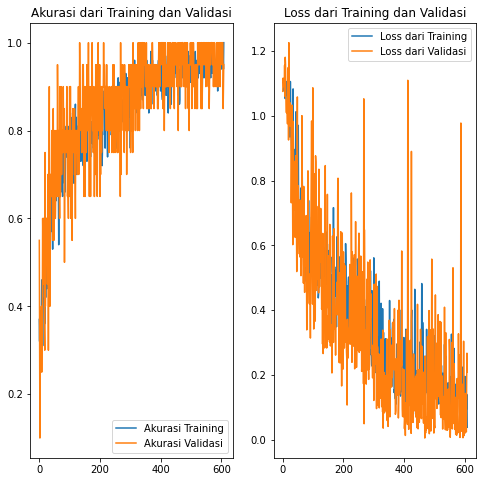

In [ ]:
#Visualisasikan Akurasi dan Loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(609) #plot dari epoch yang ada

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Akurasi Training')
plt.plot(epochs_range, val_acc, label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi dari Training dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss dari Training')
plt.plot(epochs_range, val_loss, label='Loss dari Validasi')
plt.legend(loc='upper right')
plt.title('Loss dari Training dan Validasi')
plt.show()

# **Model Validation**

Finally, I test my Deep Learning Model with my own picture (unseen dataset).

Alamat file: /content/drive/MyDrive/ML_Pemula/kertas1-removebg-preview.jpg
Gambar ini terdeteksi oleh sistem sebagai paper


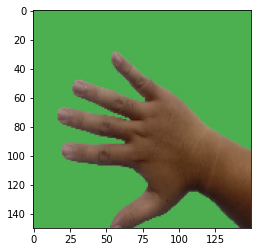

In [ ]:
#Test dengan Data saya sendiri
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils

#Memprediksi gambar yang diunggah ke Colab
fn = '/content/drive/MyDrive/ML_Pemula/kertas1-removebg-preview.jpg'
path = fn
img = image.load_img(path, target_size=(150,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
 
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
predicted_class_indices=np.argmax(classes,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
print("Alamat file:",fn)
print("Gambar ini terdeteksi oleh sistem sebagai "+str(predictions[0]))

# **Given Feedbacks from the Instructor (In Bahasa Indonesia)**

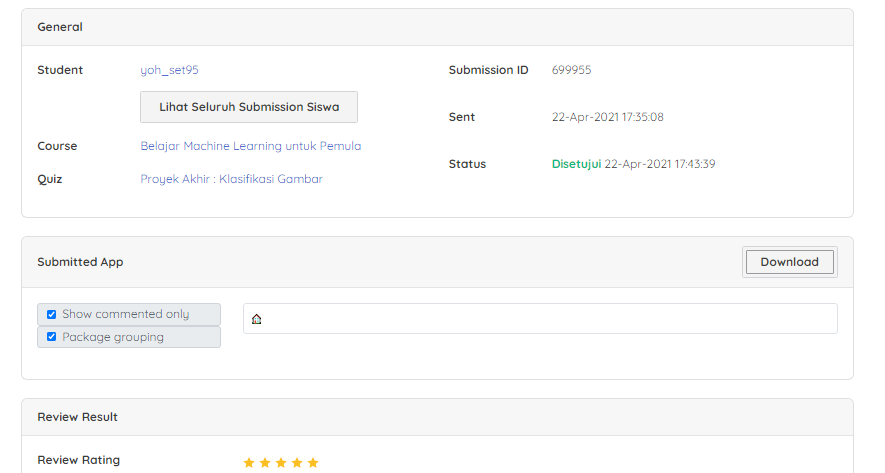

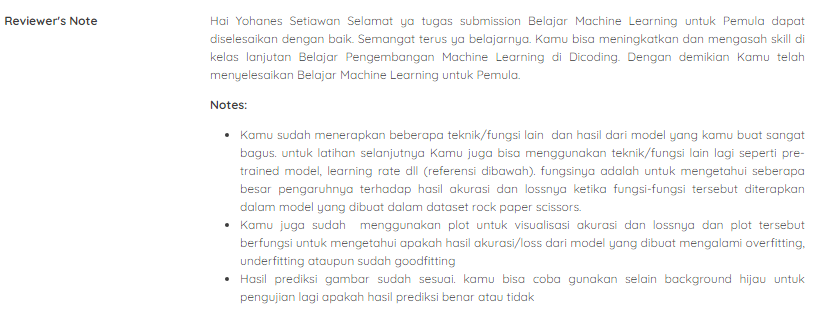